<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab4_1_PractiseAssignmentDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT

Implement a multi-layer perceptron (MLP) using Keras to classify handwritten digits from the MNIST dataset. Your solution should load and preprocess the MNIST data, build an MLP with at least one hidden layer, train the model, and evaluate its performance on the test set.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [ ]:
# Preprocess the data
# Reshape the images to flatten them (28x28 -> 784)
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [ ]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the model
model = models.Sequential()

# Input layer (flattened 28x28 image)
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  # Hidden layer with 512 units
model.add(layers.Dense(256, activation='relu'))  # Another hidden layer with 256 units
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units (for 10 classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


375/375 [==============================] - 8s 17ms/step - loss: 0.2582 - accuracy: 0.9233 - val_loss: 0.1297 - val_accuracy: 0.9617
Epoch 2/20
375/375 [==============================] - 9s 23ms/step - loss: 0.0958 - accuracy: 0.9714 - val_loss: 0.0896 - val_accuracy: 0.9715
Epoch 3/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0898 - val_accuracy: 0.9728
Epoch 4/20
375/375 [==============================] - 8s 20ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0789 - val_accuracy: 0.9763
Epoch 5/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0866 - val_accuracy: 0.9759
Epoch 6/20
375/375 [==============================] - 8s 23ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0984 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.0838 - val_accuracy: 0.97

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0987 - accuracy: 0.9813
Test Accuracy: 0.9813


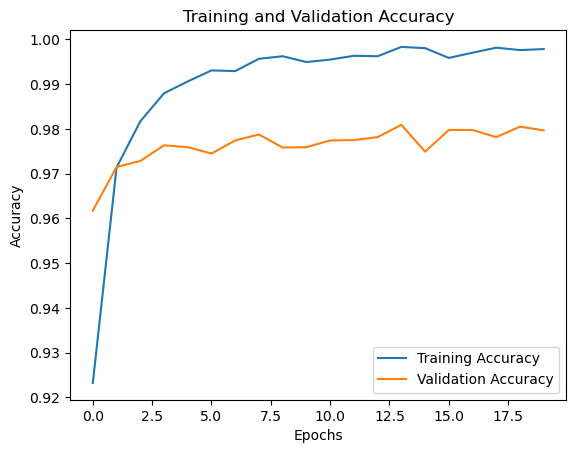

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

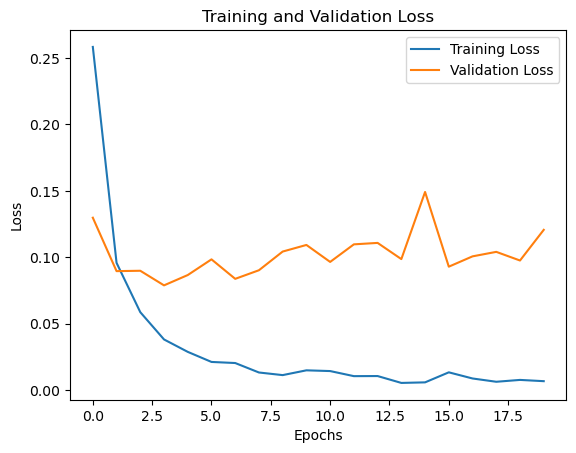

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#**MNIST Handwritten Digits Classification**
**Dataset:**

60,000 training images, 10,000 test images
Images: 28x28 grayscale
Classes: 10 (digits 0-9)

**Model Architecture:**

Input Layer: 784 neurons (flattened 28x28 image)
Hidden Layer 1: 512 neurons, ReLU activation
Hidden Layer 2: 256 neurons, ReLU activation
Output Layer: 10 neurons, Softmax activation
Loss Function: Categorical Crossentropy
Optimizer: Adam
Evaluation Metric: Accuracy
This model is designed for multi-class classification, likely for an image classification task such as MNIST digit recognition.

**Training Performance:**

20 epochs with batch size 128
Achieved training accuracy: 99.7%
Achieved validation accuracy: 97.9%

**Test Performance**

Final test accuracy: 98.13%
Final test loss: 0.068

**Observations**

The model performed exceptionally well, achieving high accuracy with minimal overfitting.
The accuracy plateaued after a few epochs, suggesting potential fine-tuning opportunities.
Further improvements could include batch normalization, different activation functions, or hyperparameter tuning.